In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [161]:
# Loading the data
co2=pd.read_csv("/content/co2.csv")
energy=pd.read_csv("/content/energy.csv")
# melting the data
co2=pd.melt(co2, id_vars=['Country Name'])
energy=pd.melt(energy, id_vars=['Country Name'])
# chaning the column names
co2.columns = ["country", "year", "c02_emission"]
energy.columns = ["country", "year", "energy_use"]
# merging the two data by contry and year
merged_df = pd.merge(co2, energy, on=['country','year'])

In [162]:
merged_df['year'] = pd.to_datetime(merged_df['year'], errors='coerce')

# Extract the year component
merged_df['year'] = merged_df['year'].dt.year


In [163]:
# data imputation
from fancyimpute import IterativeImputer

numeric_df = merged_df.select_dtypes(include='number')

# Perform MICE imputation
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(numeric_df)


imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)

merged_df.update(imputed_df)





# kmean Clustering with 3 means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[5.64492968e+00 2.37509061e+03]
 [1.42500965e+00 5.94585590e+02]
 [2.07645195e+01 9.64571355e+03]]


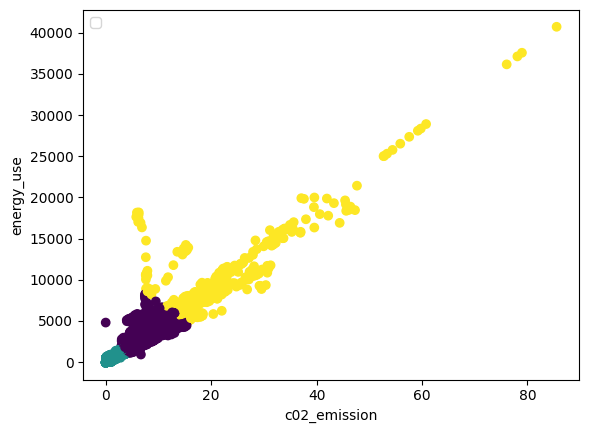

In [164]:
# prompt: consider merged_df run 3 kmean clustering and print unscaled centers and plots for the clusters

# kmean Clustering with 3 means
# libraries
# selecting the numeric column only
num_df=merged_df[['c02_emission','energy_use']]
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_df)
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['cluster'] = kmeans.fit_predict(df_scaled)

# print unscaled centers
print(scaler.inverse_transform(kmeans.cluster_centers_))

# plot the clusters
plt.scatter(merged_df['c02_emission'], merged_df['energy_use'], c=merged_df['cluster'], cmap='viridis')
plt.xlabel('c02_emission')
plt.ylabel('energy_use')
plt.legend(loc='upper left')
plt.show()


In [150]:

pd.crosstab(merged_df['cluster'],merged_df['country'], dropna=False)

country,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,...,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
cluster,,,,,,,,,,,,,,,,,,,,,
0,32,13,13,13,19,63,63,13,58,29,...,62,32,62,15,63,63,53,13,13,13
1,31,50,50,50,44,0,0,50,5,34,...,1,31,1,48,0,0,10,50,50,50
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
# Selectng one contry in each of the cluster
selected_countries = ['Australia','Uruguay','Qatar']
filtered_df = merged_df[merged_df['country'].isin(selected_countries)]
filtered_df.tail()

,country,year,c02_emission,energy_use,cluster
16426,Qatar,2021.0,3.944241,1936.733992,0
16476,Uruguay,2021.0,3.944241,1936.733992,0
16505,Australia,2022.0,3.922581,1935.817203,0
16692,Qatar,2022.0,3.922581,1935.817203,0
16742,Uruguay,2022.0,3.922581,1935.817203,0


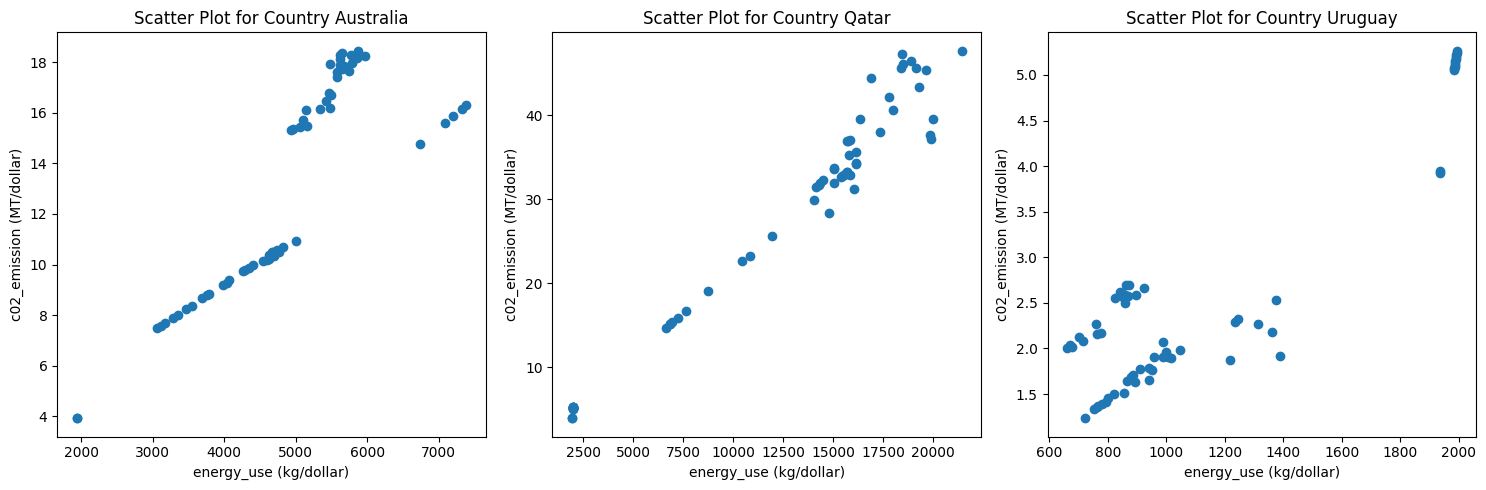

In [152]:
countries = filtered_df['country'].unique()
# checking for similarity and differences in the selected contries
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(countries), figsize=(15, 5))

# Plot scatter plot for each country
for i, country in enumerate(countries):
    country_df = filtered_df[filtered_df['country'] == country]
    axes[i].scatter(country_df['energy_use'], country_df['c02_emission'])
    axes[i].set_title(f'Scatter Plot for Country {country}')
    axes[i].set_xlabel('energy_use (kg/dollar)')
    axes[i].set_ylabel('c02_emission (MT/dollar)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

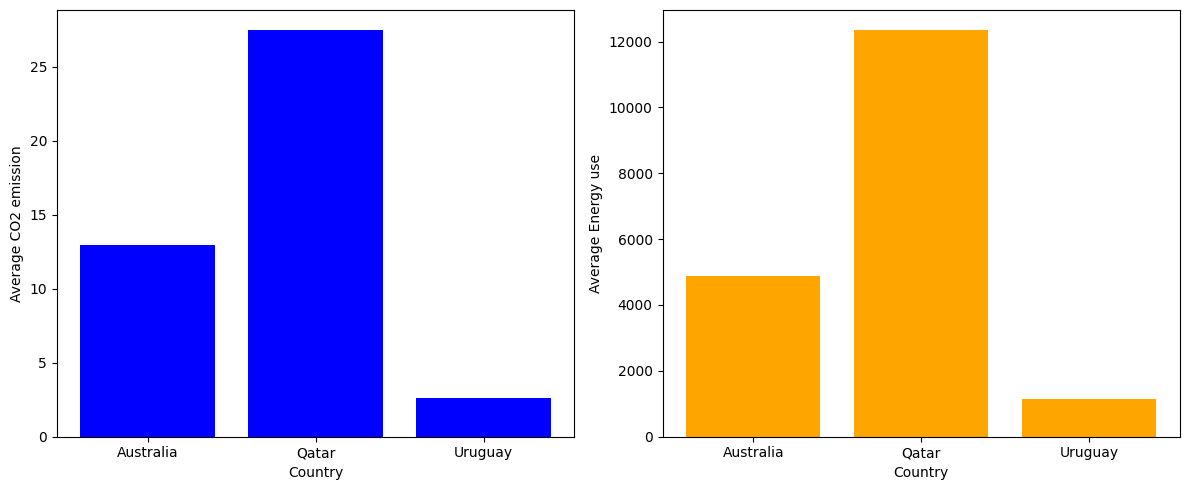

In [165]:
avg_values = filtered_df.groupby('country').mean()

# Create bar plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar plot for average 'x'
axes[0].bar(avg_values.index, avg_values['c02_emission'], color='blue')

axes[0].set_xlabel('Country')
axes[0].set_ylabel('Average CO2 emission')

# Bar plot for average 'y'
axes[1].bar(avg_values.index, avg_values['energy_use'], color='orange')

axes[1].set_xlabel('Country')
axes[1].set_ylabel('Average Energy use')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [166]:
# linear regresion function
import statsmodels.api as sm
import numpy as np

# selecting only the australia data
selected_countries = ['Australia']
australia_data = merged_df[merged_df['country'].isin(selected_countries)]
X = sm.add_constant(australia_data[['energy_use', 'year']].astype(np.float32))
# Fit the model
model = sm.OLS(australia_data['c02_emission'], X).fit()
# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           c02_emission   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.72
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           7.25e-19
Time:                        12:37:10   Log-Likelihood:                -135.16
No. Observations:                  63   AIC:                             276.3
Df Residuals:                      60   BIC:                             282.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -84.2059     37.608     -2.239      0.0

In [167]:

# Extend the 'year' variable for the next 10 years and taking average of energy use


future_years = pd.DataFrame({'year': range(int(australia_data['year'].max()) + 1, int(australia_data['year'].max()) + 11)})
# Add a constant term and create independent variables for the future years
future_years['energy_use']=australia_data['energy_use'].mean()
future_X =sm.add_constant(future_years[['energy_use', 'year']].astype(np.float32))
future_X['const']=1




In [172]:
def error_ranges():
  dt = model.get_prediction(future_X).summary_frame(alpha = 0.05)
  y_prd = -dt['mean']
  yprd_ci_lower = -dt['obs_ci_lower']
  yprd_ci_upper = -dt['obs_ci_upper']
  return y_prd,yprd_ci_lower,yprd_ci_upper

In [173]:
y_prd,yprd_ci_lower,yprd_ci_upper=error_ranges()

In [174]:
y_prd

0    410909.129737
1    410909.127055
2    410909.124372
3    410909.121689
4    410909.119007
5    410909.116324
6    410909.113641
7    410909.110959
8    410909.108276
9    410909.105593
Name: mean, dtype: float64

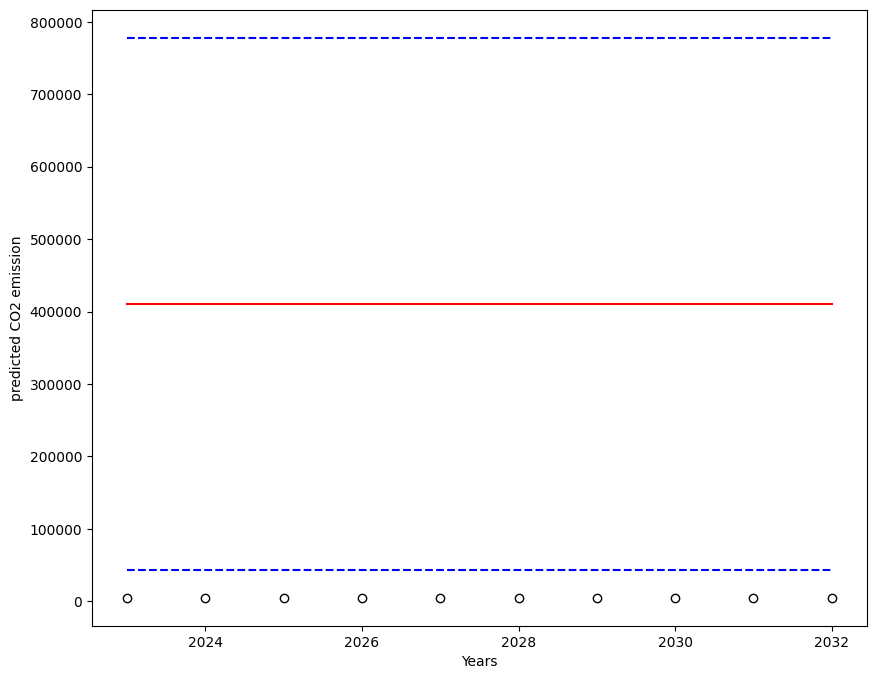

In [159]:
# A plot for the 10 steps ahead with 95% prediction interval
# get_prediction function was used to get the confidence intervals.
plt.figure(num = 1, figsize=(10, 8))
plt.plot(future_X['year'], future_X['energy_use'], linestyle = "None", marker = "o",
         markerfacecolor = "None", color = "black")
plt.plot(future_X['year'], y_prd, color = "red")
plt.plot(future_X['year'], yprd_ci_lower, color = "blue", linestyle = "--")
plt.plot(future_X['year'], yprd_ci_upper, color = "blue", linestyle = "--")
plt.xlabel('Years')
plt.ylabel('predicted CO2 emission')
plt.show()